In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [2]:
# Standard example 
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train 
from peratouch.networks import CNN
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.balance_train()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99827137]
[0.9945144]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Shape of test set: (3109, 1, 32) 
Shape of train set: (30380, 1, 32) 
Shape of validation set: (3109, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.24, 0.21, 0.2, 0.18, 0.18] 
Fraction of train labels:  [0.2, 0.2, 0.2, 0.2, 0.2] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.161, loss_val=1.174, train=51.5%, val=52.9%
End of epoch 3:loss_tr=0.965, loss_val=0.971, train=61.1%, val=60.9%
End of epoch 5:loss_tr=0.852, loss_val=0.881, train=65.6%, val=64.1%
End of epoch 7:loss_tr=0.818, loss_val=0.821, train=67.1%, val=67.7%
End of epoch 9:loss_tr=0.756, loss_val=0.780, train=70.5%, val=69.3%
End of epoch 11:loss_tr=0.735, loss_val=0.788, train=70.7%, val=68.7%
End of epoch 13:loss_tr=0.708, loss_val=0.749, train=72.0%, val=70.2%
End of epoch 15:loss_tr=0.692, loss_val=0.723, train=72.8%, val=71.4%
End of epoch 17:loss_tr=0.669, loss_val=0.701, train=73.8%, val=72.4%
End of epoch 19:loss_tr=0.660, loss_val=0.715, train=74.2%, val=71.2%
End of epoch 21:loss_tr=0.688, loss_val=0.730, train=72.6%, val=71.3%
End of epoch 23:loss_tr=0.653, loss_val=0.679, train=74.2%, val=72.5%
End of epoch 25:loss_tr=0.648, loss_val=0.677, train=74.2%, val=72.4%
End of epoch 27:loss_tr=0.601, loss_val=0.647, train=76.3%, val=74.1%
End of epoch 29:loss_tr=0

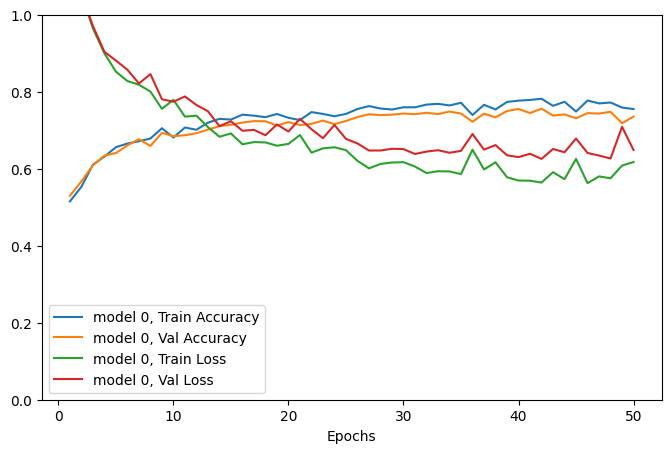

In [3]:
models = [CNN(input_ch=1, n_filters=8, n_hidden=128, out_size=5)]
trainers = [Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model, max_epochs=50, batch_size=5000)
    T.train_model(model)
plot_train(trainers)
test_accuracy([D, D], models)

In [1]:
# Look at 3 channels
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer , plot_train
from peratouch.networks import CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1. 1. 1.]
[1.00007884 0.99970505 0.99858602]
[1.00042301 1.00084248 1.0022555 ]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (3107, 3, 32) 
Shape of train set: (24860, 3, 32) 
Shape of validation set: (3108, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.19, 0.2, 0.18, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.19, 0.18, 0.19] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.881, loss_val=0.906, train=64.4%, val=62.8%
End of epoch 3:loss_tr=0.621, loss_val=0.674, train=75.7%, val=72.6%
End of epoch 5:loss_tr=0.505, loss_val=0.568, train=80.2%, val=77.3%
End of epoch 7:loss_tr=0.439, loss_val=0.515, train=82.9%, val=80.6%
End of epoch 9:loss_tr=0.413, loss_val=0.500, train=84.0%, val=80.5%
End of epoch 11:loss_tr=0.439, loss_val=0.528, train=83.2%, val=80.7%
End of epoch 13:loss_tr=0.374, loss_val=0.478, train=85.5%, val=82.4%
End of epoch 15:loss_tr=0.393, loss_val=0.505, train=84.8%, val=80.5%
End of epoch 17:loss_tr=0.362, loss_val=0.466, train=85.9%, val=82.3%
End of epoch 19:loss_tr=0.327, loss_val=0.419, train=87.6%, val=84.1%
End of epoch 21:loss_tr=0.319, loss_val=0.431, train=87.8%, val=84.1%
End of epoch 23:loss_tr=0.336, loss_val=0.447, train=87.1%, val=82.9%
End of epoch 25:loss_tr=0.325, loss_val=0.433, train=87.5%, val=83.2%
End of epoch 27:loss_tr=0.334, loss_val=0.441, train=87.0%, val=82.9%
End of epoch 29:loss_tr=0

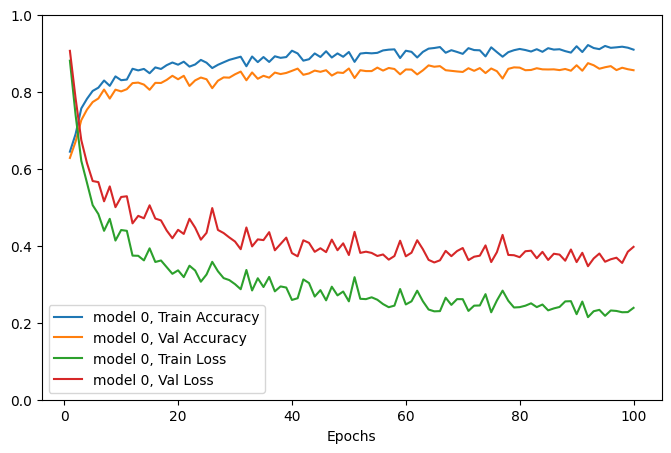

In [2]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=16, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=100, batch_size=700)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

In [1]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64